#### Maruyama's Co-C potential by hacking LAMMPS/src/MANYBODY/pair_tersoff_mod.cpp

$$
\begin{gather*} 
V_{i j}=f^{c}\left(r_{i j}\right)(V^{R}\left(r_{i j}\right)-b_{i j} V^{A}\left(r_{i j}\right))
\end{gather*}
$$

$f^c$ have the same form 

LAMMPS

$$
\begin{gather*} 
V^{R}(r) =A \exp \left(-\lambda_{1} r\right) \\ V^{A}(r) =B \exp \left(-\lambda_{2} r\right) \\ b_{i j} =\left(1+\beta^{n} \zeta_{i j}^{n}\right)^{-\frac{1}{2 n}} \\ \zeta_{i j} =\sum_{k \neq i, j} f^{c}\left(r_{i k}\right) g\left(\theta_{i j k}\right) \exp \left[\lambda_{3}^{m}\left(r_{i j}-r_{i k}\right)^{m}\right] \\ g(\theta) =\gamma\left(1+\frac{c^{2}}{d^{2}}-\frac{c^{2}}{d^{2}+\left(\cos \theta-\cos \theta_{0}\right)^{2}}\right) 
\end{gather*}
$$

Maruyama Tersoff
$$
\begin{gather*}
V^{R}(r)=\frac{D_\mathrm{e}}{S-1} \exp \left[-\beta \sqrt{2 S}\left(r-R_\mathrm{e}\right)\right] \\V^{A}(r)=\frac{S D_\mathrm{e}}{S-1} \exp \left[-\beta \sqrt{2 S^{-1}}\left(r-R_\mathrm{e}\right)\right]\\b_{i j}=\left(1+b{N^\mathrm{C}_{ij}}'\right)^\delta\\{N^\mathrm{C}_{ij}}'=\sum_{\mathrm{carbon}\ k\neq i,j}f^c(r_{ik})
\end{gather*}
$$

Thus
$$
\begin{gather*}
b_{i j} =\left(1+\beta^{n} \zeta_{i j}^{n}\right)^{-\frac{1}{2 n}} \rightarrow b_{i j} =f_i\left(1+\beta {N^\mathrm{C}_{i j}}'\right)^\delta
\end{gather*}
$$

And
$$
\begin{gather*}
A=\frac{D_\mathrm{e}}{S-1}\exp(\beta\sqrt{2S}R_\mathrm{e})\\B=\frac{SD_\mathrm{e}}{S-1}\exp(\beta\sqrt{2S^{-1}}R_\mathrm{e})\\\lambda_1=\beta\sqrt{2S}\\\lambda_2=\beta\sqrt{2S^{-1}}\\\lambda_3=0\\\gamma_\mathrm{CoCCo}=0,\ \gamma_\mathrm{CoCW}=0,\ \gamma_\mathrm{CoCC}=1,\ \gamma_\mathrm{CoCH}=0,\ f_\mathrm{Co}=2\\\gamma_\mathrm{CCoCo}=0,\ \gamma_\mathrm{CCoCW}=0,\ \gamma_\mathrm{CCoC}=0,\ \gamma_\mathrm{CCoH}=0,\ f_\mathrm{C}=0\\c=0\\d=1\\\cos\theta_0=0\\\beta=b\\m=1
\end{gather*}
$$

Original param.powern -> param.delta, appended param.f 


In [16]:
import numpy as np
from matplotlib import pyplot as plt
De = 3.7507 # eV
Re = 1.6978 # Ang
beta = 1.3513 # Ang^-1
S = 1.3
c = 0
d = 1
R = 2.85 # Ang
D = 0.15 # Ang
b = 0.0889
delta = -0.6256
#### LAMMPS
A_lmp = De / (S - 1) * np.exp(beta * np.sqrt(2 * S) * Re)
B_lmp = S * De / (S - 1) * np.exp(beta * np.sqrt(2 / S) * Re)
lambda1_lmp = beta * np.sqrt(2 * S)
lambda2_lmp = beta * np.sqrt(2 / S)
lambda3_lmp = 0
delta_lmp = delta
m_lmp = 1 # threebody
costheta0_lmp = 0 # threebody
c_lmp = c # threebody
d_lmp = d # threebody
beta_lmp = b
R_lmp = R
D_lmp = D

print('Co C Co', m_lmp, 0, lambda3_lmp, c_lmp, d_lmp, costheta0_lmp, delta_lmp, beta_lmp, end=' ')
print(lambda2_lmp, B_lmp, R_lmp, D_lmp, lambda1_lmp, A_lmp, 2)
print('Co C W', m_lmp, 0, lambda3_lmp, c_lmp, d_lmp, costheta0_lmp, delta_lmp, beta_lmp, end=' ')
print(lambda2_lmp, B_lmp, R_lmp, D_lmp, lambda1_lmp, A_lmp, 2)
print('Co C C', m_lmp, 1, lambda3_lmp, c_lmp, d_lmp, costheta0_lmp, delta_lmp, beta_lmp, end=' ')
print(lambda2_lmp, B_lmp, R_lmp, D_lmp, lambda1_lmp, A_lmp, 2)
print('Co C H', m_lmp, 0, lambda3_lmp, c_lmp, d_lmp, costheta0_lmp, delta_lmp, beta_lmp, end=' ')
print(lambda2_lmp, B_lmp, R_lmp, D_lmp, lambda1_lmp, A_lmp, 2)
print('C Co W', m_lmp, 0, lambda3_lmp, c_lmp, d_lmp, costheta0_lmp, delta_lmp, beta_lmp, end=' ')
print(lambda2_lmp, B_lmp, R_lmp, D_lmp, lambda1_lmp, A_lmp, 0)
print('C Co Co', m_lmp, 0, lambda3_lmp, c_lmp, d_lmp, costheta0_lmp, delta_lmp, beta_lmp, end=' ')
print(lambda2_lmp, B_lmp, R_lmp, D_lmp, lambda1_lmp, A_lmp, 0)
print('C Co C', m_lmp, 0, lambda3_lmp, c_lmp, d_lmp, costheta0_lmp, delta_lmp, beta_lmp, end=' ')
print(lambda2_lmp, B_lmp, R_lmp, D_lmp, lambda1_lmp, A_lmp, 0)
print('C Co H', m_lmp, 0, lambda3_lmp, c_lmp, d_lmp, costheta0_lmp, delta_lmp, beta_lmp, end=' ')
print(lambda2_lmp, B_lmp, R_lmp, D_lmp, lambda1_lmp, A_lmp, 0)
s = ['Co', 'W', 'C', 'H']
for i in s:
    for j in s:
        if (i, j) != ('Co', 'C') and (i, j) != ('C', 'Co'):
            for k in s:
                print(i, j, k, 1, ' '.join(['0'] * 14))

Co C Co 1 0 0 0 1 0 -0.6256 0.0889 1.6760813685039735 279.75955594102084 2.85 0.15 2.178905779055166 505.35518831058204 2
Co C W 1 0 0 0 1 0 -0.6256 0.0889 1.6760813685039735 279.75955594102084 2.85 0.15 2.178905779055166 505.35518831058204 2
Co C C 1 1 0 0 1 0 -0.6256 0.0889 1.6760813685039735 279.75955594102084 2.85 0.15 2.178905779055166 505.35518831058204 2
Co C H 1 0 0 0 1 0 -0.6256 0.0889 1.6760813685039735 279.75955594102084 2.85 0.15 2.178905779055166 505.35518831058204 2
C Co W 1 0 0 0 1 0 -0.6256 0.0889 1.6760813685039735 279.75955594102084 2.85 0.15 2.178905779055166 505.35518831058204 0
C Co Co 1 0 0 0 1 0 -0.6256 0.0889 1.6760813685039735 279.75955594102084 2.85 0.15 2.178905779055166 505.35518831058204 0
C Co C 1 0 0 0 1 0 -0.6256 0.0889 1.6760813685039735 279.75955594102084 2.85 0.15 2.178905779055166 505.35518831058204 0
C Co H 1 0 0 0 1 0 -0.6256 0.0889 1.6760813685039735 279.75955594102084 2.85 0.15 2.178905779055166 505.35518831058204 0
Co Co Co 1 0 0 0 0 0 0 0 0 0 0

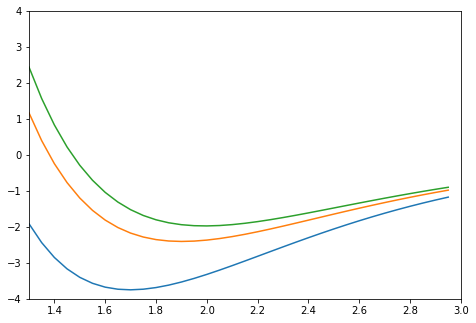

In [14]:
%matplotlib inline
x = np.arange(1.3, 3, 0.05)
NCij = 0
pot = lambda rij: A_lmp * np.exp(-lambda1_lmp * rij) - (1 + beta_lmp * NCij) ** delta_lmp * B_lmp * np.exp(-lambda2_lmp * rij)
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
y = np.vectorize(pot)(x)
ax.plot(x, y)
NCij = 2
y = np.vectorize(pot)(x)
ax.plot(x, y)
NCij = 3
y = np.vectorize(pot)(x)
ax.plot(x, y)
ax.set_xlim(1.3, 3)
ax.set_ylim(-4, 4)
fig.show()